In [1]:
#Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#membaca data
dataset=pd.read_csv('Real estate.csv')
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#melihat informasi data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
#menghapus kolom 'No' karena tidak terpakai
dataset=dataset.drop(['No'], axis=1)

In [5]:
dataset.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
#membagi data menjadi variabel dependen dan independen
x=dataset.drop('Y house price of unit area', axis=1)
y=dataset['Y house price of unit area']

In [7]:
#memecah data menjadi data latih dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
#membuat model regresi linear
mlr=LinearRegression()
mlr.fit(x_train, y_train)

print(mlr.intercept_)
print(mlr.coef_)

-13044.23191715854
[ 5.44074186e+00 -2.70791490e-01 -4.75863892e-03  1.09142527e+00
  2.29043054e+02 -2.94925908e+01]


In [9]:
pd.DataFrame({'Variables' : x.columns.values, 'Coefficient':mlr.coef_})

,Variables,Coefficient
0,X1 transaction date,5.440742
1,X2 house age,-0.270791
2,X3 distance to the nearest MRT station,-0.004759
3,X4 number of convenience stores,1.091425
4,X5 latitude,229.043054
5,X6 longitude,-29.492591


In [10]:
#melakukan prediksi data price
y_pred=mlr.predict(x_test).flatten()
y_pred

array([47.88625422, 41.16404556, 44.27301439, 40.19761542, 27.51326511,
       45.10953115, 44.63293274, 46.36346234, 23.62063133, 54.33444894,
       34.07416461, 36.54533193, 37.55154254, 23.2794052 , 35.26614165,
       34.38327747, 43.35633504, 45.40740539, 30.07083159, 44.09191493,
        0.73505984, 34.99271686, 48.22735154, 45.48646485, 11.5995282 ,
       39.69783664, 12.71276251, 42.91282893, 34.93451401, 37.27964515,
       13.17842185, 40.12708486, 35.21883505, 27.71588924, 46.40090931,
       31.21941994, 50.90046891, 14.07339433, 49.05344276, 40.0538446 ,
       38.24588962, 40.63256441, 47.01634759, 37.65598977, 39.85801839,
       46.88588156, 43.7241343 , 20.94434531, 47.41546271, 45.40608841,
       48.33783579, 48.98845389, 42.27403852, 42.5841908 , 36.04088185,
       14.95491907, 36.61494629, 34.88196676, 28.33519081, 45.91188076,
       33.19268817, 32.18910095, 14.95491907,  8.86547927, 10.36079881,
       34.11119212, 28.48186875, 46.59826043, 32.96743316, 31.47

In [11]:
df=pd.DataFrame({'Acual':y_test, 'Prediction':y_pred}).reset_index().iloc[:,1:]
df

,Acual,Prediction
0,45.1,47.886254
1,42.3,41.164046
2,52.2,44.273014
3,37.3,40.197615
4,22.8,27.513265
...,...,...
78,25.0,40.368699
79,23.5,33.091396
80,35.6,42.327834
81,46.1,43.353985


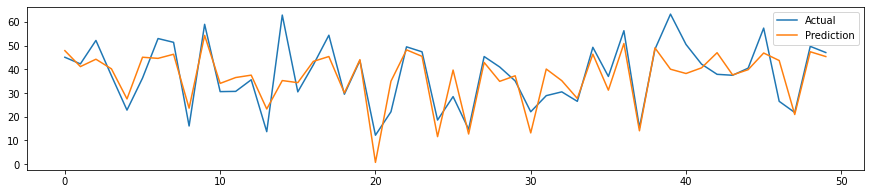

In [12]:
#melihat plot prediksi data
compare=pd.DataFrame({'Actual':y_test.values.flatten(), 'Prediction': y_pred})
compare.head(50).plot(kind='line', figsize=(15,3))

In [13]:
#melihat error dari pemodelan
print('Mean Absolute Error (MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error (MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error (RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R-Squared (R2); {:.2f}'.format(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error (MAE): 5.31
Mean Squared Error (MSE): 53.51
Root Mean Squared Error (RMSE): 7.31
R-Squared (R2); 0.68


In [14]:
#mengimpor library untuk generalisasi model
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [16]:
#membuat model generalisasi
ridge=Ridge()
lasso=Lasso()
elastic=ElasticNet()

ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
elastic.fit(x_train, y_train)

#prediksi model
r_pred = ridge.predict(x_test)
l_pred = lasso.predict(x_test)
e_pred = elastic.predict(x_test)
lr_pred = y_pred

all_pred=pd.DataFrame({'Actual':y_test, 
                       'LinearRegression':lr_pred, 
                       'Ridge':r_pred, 
                       'Lasso':l_pred, 
                       'ElasticNet':e_pred})
all_pred=all_pred.reset_index().iloc[:,1:]
all_pred

,Actual,LinearRegression,Ridge,Lasso,ElasticNet
0,45.1,47.886254,49.666714,49.364626,49.408156
1,42.3,41.164046,42.710144,43.586802,43.598143
2,52.2,44.273014,42.991639,43.869586,43.936237
3,37.3,40.197615,39.353665,41.329116,41.359997
4,22.8,27.513265,27.153202,29.955751,29.945885
...,...,...,...,...,...
78,25.0,40.368699,38.113922,40.051158,40.005872
79,23.5,33.091396,27.965834,26.798923,26.756220
80,35.6,42.327834,40.417797,39.939315,39.944654
81,46.1,43.353985,41.494580,44.165403,44.170995


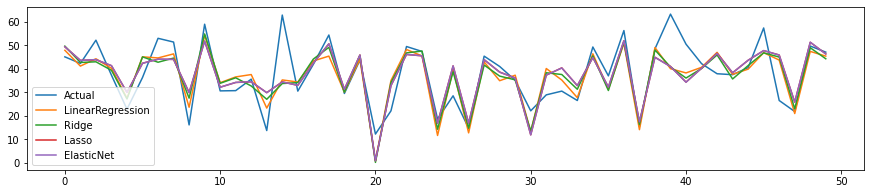

In [17]:
all_pred.head(50).plot(kind='line', figsize=(15,3))

In [18]:
#menghitung error masing-masing model
model=['LinearRegression','Ridge','Lasso','ElasticNet']
model_pred=[lr_pred, r_pred, l_pred, e_pred]
mse=[]
mae=[]
rmse=[]
r2_score=[]
for i in range (len(model)):
  mae.append(metrics.mean_absolute_error(y_test, model_pred[i]))
  mse.append(metrics.mean_squared_error(y_test, model_pred[i]))
  rmse.append(np.sqrt(metrics.mean_squared_error(y_test, model_pred[i])))
  r2_score.append(metrics.r2_score(y_test, model_pred[i]))

pd.DataFrame({'MSE':mse,
              'MAE':mae,
              'RMSE':rmse,
              'R2_Score':r2_score}
             , index=model).sort_values('RMSE')

,MSE,MAE,RMSE,R2_Score
LinearRegression,53.505619,5.305356,7.314754,0.681058
Ridge,55.897750,5.499841,7.476480,0.666799
Lasso,59.559624,5.701241,7.717488,0.644971
ElasticNet,59.597221,5.699907,7.719924,0.644747


**Dari tabel tersebut, model Regresi Linear memiliki nilai MSE yang paling kecil. Sedangkan pada model regularisasi (Ridge, Lasso, dan ElasticNet) memiliki peningkatan dalam MSE. Hal ini membuktikan bahwa regularisasi dapat dilakukan untuk menambah bias dan mengurangi variance untuk menanggulangi overfitting**

**Untuk model underfitting, dimana model seharusnya menggunakan polinomial akan dijelaskan pada dataset1.**

In [40]:
#import data
dataset1=pd.read_csv('rank_salary.csv')
dataset1

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
5,Professor,6,150000
6,Associate Dean,7,200000
7,Dean,8,300000
8,Vice Chancellor,9,500000
9,Chancellor,10,1000000


In [41]:
#menghapus kolom position
dataset1=dataset1.drop(['Position'], axis=1)

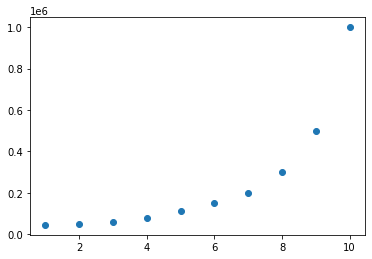

In [42]:
#melihat pola data
plt.scatter(dataset1['Level'],dataset1['Salary'])

In [43]:
#membuat model regresi linear dan regularisasi
model_LR=LinearRegression()
model_RD=Ridge()
model_LS=Lasso()
model_EN=ElasticNet()

model_LR.fit(dataset1[['Level']], dataset1['Salary'])
model_RD.fit(dataset1[['Level']], dataset1['Salary'])
model_LS.fit(dataset1[['Level']], dataset1['Salary'])
model_EN.fit(dataset1[['Level']], dataset1['Salary'])

dataset1['y_LR'] = model_LR.predict(dataset1[['Level']])
dataset1['y_RD'] = model_RD.predict(dataset1[['Level']])
dataset1['y_LS'] = model_LS.predict(dataset1[['Level']])
dataset1['y_EN'] = model_EN.predict(dataset1[['Level']])
dataset1.head()

,Level,Salary,y_LR,y_RD,y_LS,y_EN
0,1,45000,-114454.545455,-110095.808383,-114454.000000,-93656.885714
1,2,50000,-33575.757576,-30185.628743,-33575.333333,-17399.800000
2,3,60000,47303.030303,49724.550898,47303.333333,58857.285714
3,4,80000,128181.818182,129634.730539,128182.000000,135114.371429
4,5,110000,209060.606061,209544.910180,209060.666667,211371.457143


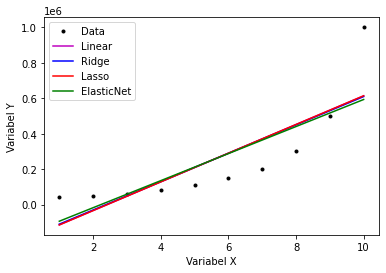

In [44]:
#plot model dengan data aktual
plt.plot(dataset1[['Level']], dataset1['Salary'], 'k.')
plt.plot(dataset1[['Level']], dataset1['y_LR'], 'm-')
plt.plot(dataset1[['Level']], dataset1['y_RD'], 'b-')
plt.plot(dataset1[['Level']], dataset1['y_LS'], 'r-')
plt.plot(dataset1[['Level']], dataset1['y_EN'], 'g-')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.legend(['Data', 'Linear', 'Ridge', 'Lasso', 'ElasticNet'])
plt.show()

**Dapat dilihat pada plot tersebut, baik metode regresi linear maupun regularisasi tidak mampu menggambarkan pola data dengan baik karena memiliki bias yang tinggi (underfitting). Hal ini dapat diselesaikan dengan mengubah metode yang mengikuti sebaran data yaitu regresi polinomial.**

In [45]:
for i in range(2,6):
  dataset1['Level{}'.format(i)]=dataset1['Level']**i

model_poly=LinearRegression()

xn=['Level']
for i in range (2,6):
  xn.append(f'Level{i}')
  model_poly.fit(dataset1[xn], dataset1['Salary'])
  dataset1[f'y_Poly{i}']=model_poly.predict(dataset1[xn])

dataset1.head()


,Level,Salary,y_LR,y_RD,y_LS,y_EN,Level2,Level3,Level4,Level5,y_Poly2,y_Poly3,y_Poly4,y_Poly5
0,1,45000,-114454.545455,-110095.808383,-114454.000000,-93656.885714,1,1,1,1,118727.272727,14902.097902,53356.643357,43895.104895
1,2,50000,-33575.757576,-30185.628743,-33575.333333,-17399.800000,4,8,16,32,44151.515152,78759.906760,31759.906760,53836.829837
2,3,60000,47303.030303,49724.550898,47303.333333,58857.285714,9,27,81,243,8439.393939,94960.372960,58642.191142,57065.268065
3,4,80000,128181.818182,129634.730539,128182.000000,135114.371429,16,64,256,1024,11590.909091,88223.776224,94632.867133,77286.713287
4,5,110000,209060.606061,209544.910180,209060.666667,211371.457143,25,125,625,3125,53606.060606,83270.396270,121724.941725,112263.403263


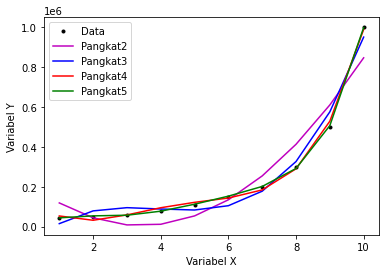

In [46]:
#plot regresi polinomial terhadap data aktual
plt.plot(dataset1['Level'], dataset1['Salary'], 'k.')
plt.plot(dataset1[['Level']], dataset1['y_Poly2'], 'm-')
plt.plot(dataset1[['Level']], dataset1['y_Poly3'], 'b-')
plt.plot(dataset1[['Level']], dataset1['y_Poly4'], 'r-')
plt.plot(dataset1[['Level']], dataset1['y_Poly5'], 'g-')
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.legend(['Data', 'Pangkat2', 'Pangkat3', 'Pangkat4', 'Pangkat5'])
plt.show()

**Dari plot regresi polinomial derajat 2 sampai 5 tersebut, dapat dibuktikan bahwa model regresi polinomial mampu mengatasi bias yang tinggi (underfitting) sehingga memiliki model yang lebih mampu merepresentasikan data**